In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
### VECTOR DE TEMPERATURAS
Tes = np.linspace(300,15e4,int((1e5-300)/100)+1)
Tis = np.linspace(300,1e4,int((1e5-300)/20)+1)

TES,TIS = np.meshgrid(Tes,Tis)
### TEMPERATURA DE FERMI
Tf = 135399
### Temperatura Melting
Tm = 933.5

### MOLES Y NUMERO DE PARTICULAS
Na = 6.022e23 ## mol^-1
V = 10e-6 ## m^3 / mol
N = Na / V

### CONSTANTE DE BOLTZMANN
kb = 1.38e-23 ## J/K

### COEFICIENTE PARA HEAT CAPACITY e-
Ce0 = 134.5 ## J/ (m^3 K^2)

### Parámetro auxiliar de Heat Capacity
Ce_aux = Ce0 * Tf/ np.pi**2 + (3*N*kb/2 - Ce0*Tf/np.pi**2)/(Tf - Tf/np.pi**2) * (
Tes - Tf/np.pi**2)

### CONSTANTES! PERO PARA COOPER, NO SÉ QUE SON
chi = 377 ## W/(m K)
eta = 0.139
taue = TES/Tf
taul = TIS/Tf


Grt = 5.69e17
### VALORES PARA COOPER!!
Ae = 1.75e7
Bl = 1.98e11

G = Grt * (Ae/Bl * (TES + TIS) + 1)

In [69]:
ke = chi * taue *(taue**2 +0.16)**(5/4) * (taue**2 + 0.44) /(taue**2 + 0.092)**0.5 /(taue**2 + eta*taul)

In [70]:
G = Grt * (Ae/Bl * (TES + TIS) + 1)

In [71]:
Ce = []
for index,T in enumerate(Tes):
    if (T < Tf/np.pi**2):
        Ce.append(Ce0*T)
    elif (Tf/np.pi**2 < T < 3*Tf/np.pi**2):
        Ce.append(Ce0*Tf/np.pi**2 + (N*kb - Ce0*Tf/np.pi**2)/(2*Tf/np.pi**2)*(T-Tf/np.pi**2)) 
    elif (3*Tf/np.pi**2 < T < Tf):
        Ce.append(N*kb + (N*kb/2)/(Tf-3*Tf/np.pi**2) * (T-3*Tf/np.pi**2))
    else:
        Ce.append(3 * N * kb / 2)
        
        
Ci = []

for index,T in enumerate(Tis):
    if T < Tm:
        Ci.append(313.7 + 0.324*T - 2.687e-4 * T**2 + 1.257e-7*T**3)
    else:
        Ci.append(510.1)

In [73]:
plt.plot(Ce)

In [85]:
N*kb

831036.0

In [84]:
Ce0*Tf/np.pi**2

1845176.8439665062

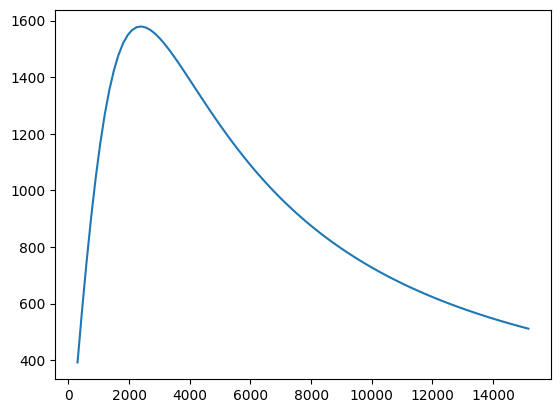

In [67]:
plt.plot(Tes[:100],ke[0,:100])